# Generate Calibration Cross Templates for PPS membrane slides

This calibration template contains 3 larger calibration crosses in the top left corner, the bottom left corner and the middle of the right side as well as a slide ID number.

In [1]:
import numpy as np
import os

from lmd.lib import Collection
from lmd.tools import text, makeCross
import numpy as np

In [ ]:
# ============ parameters ============
# these calibration points are compatible with the calibration marker preset DOES NOT NEED TO BE CHANGED FOR REGULAR PPS MEMBRANE SLIDES
n_marker = np.array([[0, 27610], [0, 0], [9690, 0]])

# offset of the raster in um
offset = np.array([1000,1000])

# size of a single unit cell
# the margin is subtracted from this to give the final shape
size = 324*0.25

# margin as fraction of the unit cell size
margin = 0.2

# number of rows/columns
N = 100

# 90 degree clockwise. DOES NOT NEED TO BE CHANGED
orientation_transform = np.array([[-1,0],[0,-1]])

# =====================================
size_px = size/1.62
offset_px = offset/1.62

# =====================================
# define ID number to be burned onto slide
id = 1000
outdir = "../../../src/pylmd_data/calibration_templates"

if not os.path.exists(outdir):
    os.makedirs(outdir)


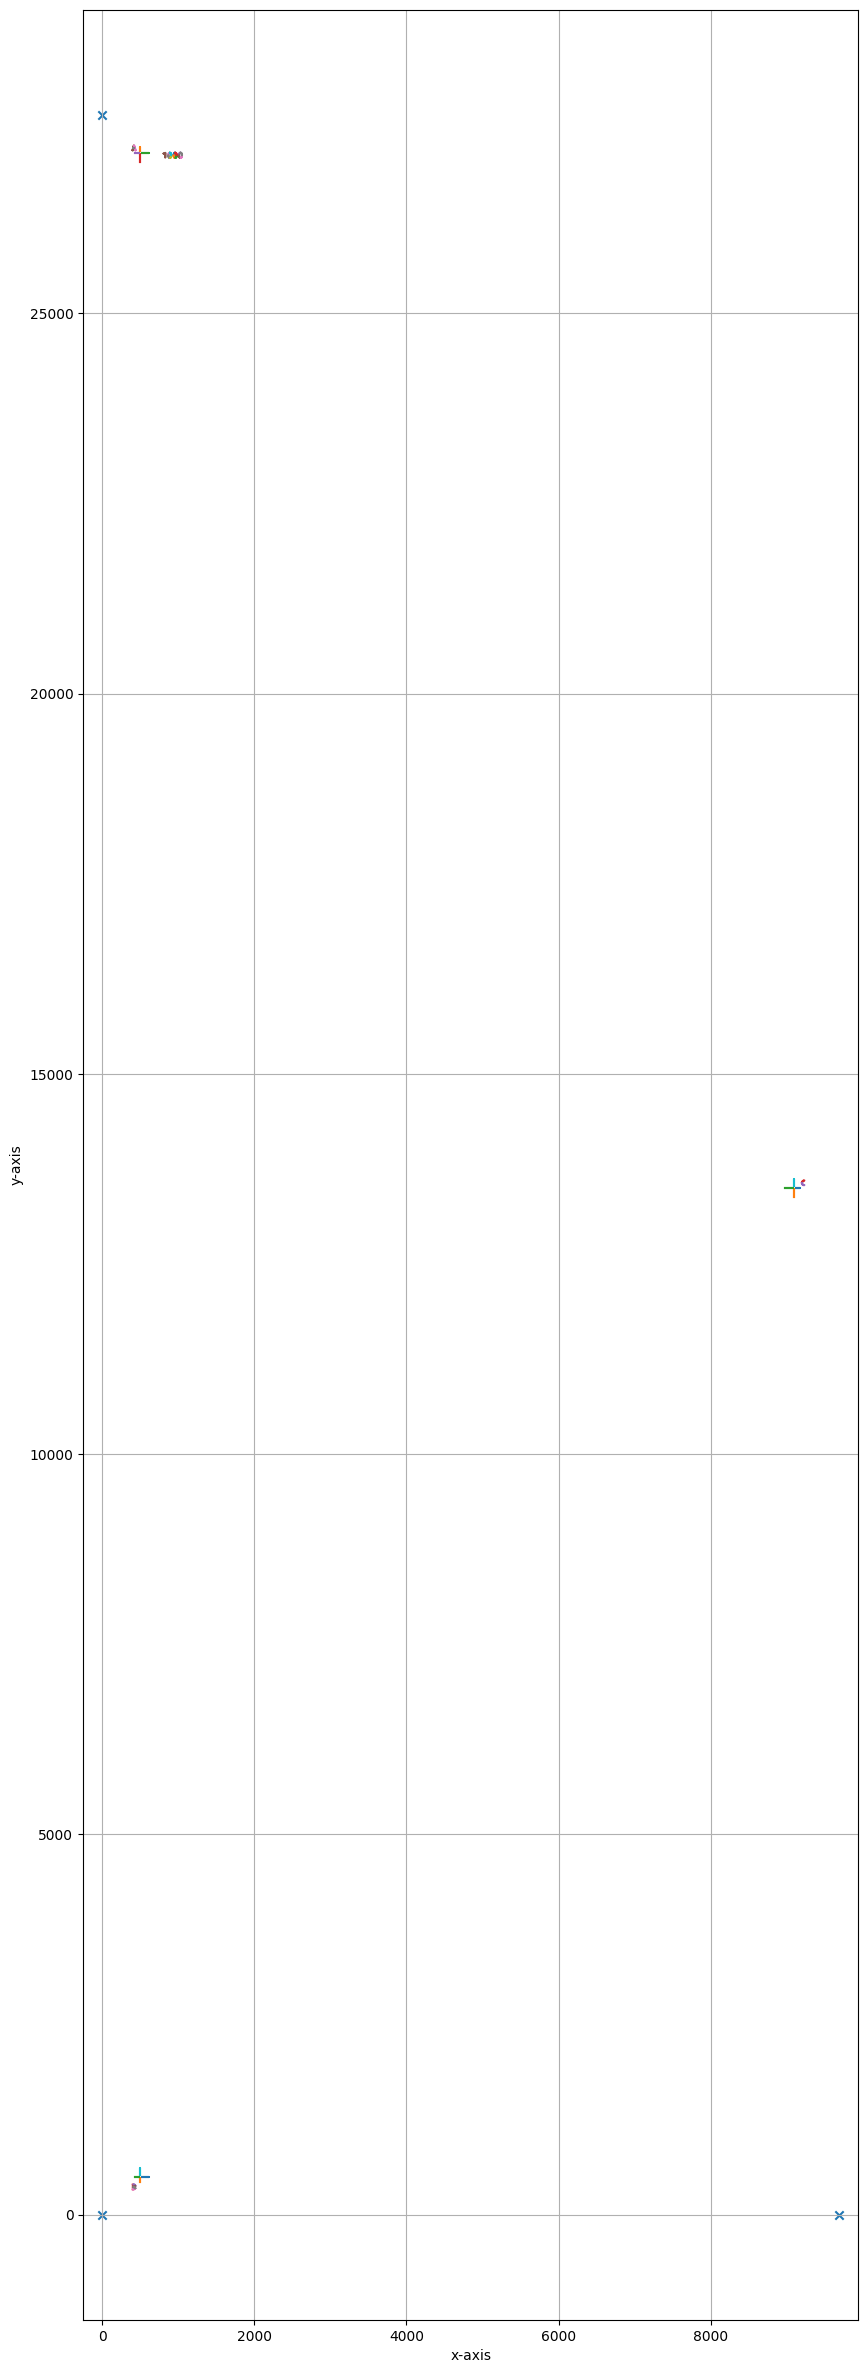

[      0. 2761000.]
[0. 0.]
[969000.      0.]


In [3]:
shapefile = Collection()
shapefile.calibration_points = n_marker

offset = np.array([500,27110])
offset_letter = (offset + np.array([-100, 100]))
cross1 = makeCross(offset, [50,100,100,50], 0.5, 10)
shapefile.join(cross1)
shapefile.join(text('A', offset = offset_letter, multiplier = 7))

offset=np.array([500,500]) 
offset_letter = (offset+np.array([-100,-100]))
cross2 = makeCross(offset,[100,100,50,50],0.5,10)
shapefile.join(cross2)
shapefile.join(text('B', offset = offset_letter,  multiplier = 7))

offset=np.array([9100, 13500]) 
offset_letter = (offset+np.array([100,100]))
cross3 = makeCross(offset,[100, 50, 100, 100],0.5,10)
shapefile.join(cross3)
shapefile.join(text('C', offset = offset_letter,  multiplier = 7))

#generate slide ID number
offset_ID = np.array([800, 27110])
shapefile.join(text(str(id).zfill(3), offset = offset_ID, multiplier = 7))
    
shapefile.plot(calibration=True, fig_size = (10, 30))
shapefile.save(f"{outdir}/calibration_template_{id}.xml")